# Assignment 2
## Statistical treatment for Retail Dataset
## NYC Property Sales Dataset from Kaggle

In [1]:
#import statement 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#load data set
df = pd.read_csv('./dataset/nyc-rolling-sales.csv')

In [3]:
#show top 5 row dataset
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#show bottom 5 row dataset
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

In [5]:
#shape dataset
df.shape

(84548, 22)

data has 84548 row and 22 column

# Data Preparation

In [6]:
#drop column "Unnamed: 0" and "EASE-MENT"
df.drop(['Unnamed: 0','EASE-MENT'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [8]:
#check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [11]:
#cek percentage missing value
df.isnull().sum()/len(df)*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

around 30% missing values for LAND SQUARE FEET and GROSS SQUARE FEET, around 17% missing values for SALE PRICE

In [12]:
#Fill missing value from one column to another for LAND SQUARE FEET and GROSS SQUARE FEET

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [13]:
# cek and drop duplicate
print(sum(df.duplicated()))
df.drop_duplicates(inplace=True)

765


In [14]:
print(sum(df.duplicated()))

0


In [15]:
df.isnull().sum()/len(df)*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.091033
GROSS SQUARE FEET                 31.091033
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        16.919900
SALE DATE                          0.000000
dtype: float64

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

In [16]:
#drop Missing value sales Price

df.dropna(subset=['SALE PRICE'], inplace=True)

In [17]:
df.shape

(69607, 20)

After removing the missing SALE PRICES we are left with 70k observations, down from 85k at the very start

# Exploratory data analysis 

In [18]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,4.845300e+04,4.845300e+04,69607.000000,6.960700e+04
mean,2.922996,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.547601e+03,3.799641e+03,1799.852184,1.280703e+06
std,1.236549,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.973838e+04,3.872427e+04,520.099311,1.143036e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.425000e+03,8.460000e+02,1920.000000,2.300000e+05
50%,3.000000,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.632000e+03,1938.000000,5.330000e+05
75%,4.000000,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.530000e+03,1965.000000,9.500000e+05
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

-There are zipcodes with 0 value 
-Year column has a year with 0
-at least 50% properties has 1 unit 
-75% of properties have no COMMERCIAL UNITS
-Most sales prices less than 10000 can be treated as gift or transfer fees.

# MEAN, MEDIAN, MODE, RANGE, SD, VARIANCE for SALE PRICE each BOROUGH

In [19]:
#mean,median, min, max, std, var for sale price each borough
df.groupby("BOROUGH").agg({'SALE PRICE': [np.size, np.mean, np.median, np.min, np.max, np.std, np.var]})

SALE PRICE                                                            \
              size          mean     median amin          amax           std   
BOROUGH                                                                        
1          14374.0  3.344642e+06  1155000.0  1.0  2.210000e+09  2.414048e+07   
2           6994.0  5.946771e+05   274897.0  0.0  1.100000e+08  2.793509e+06   
3          23843.0  8.410834e+05   425605.0  0.0  3.450000e+08  3.951912e+06   
4          18410.0  7.388827e+05   495000.0  1.0  2.575000e+08  3.227420e+06   
5           5986.0  5.436113e+05   465000.0  1.0  1.220000e+08  1.905544e+06   

                       
                  var  
BOROUGH                
1        5.827628e+14  
2        7.803693e+12  
3        1.561761e+13  
4        1.041624e+13  
5        3.631100e+12

In [20]:
#Mode For BOROUGH = 1
df[(df['BOROUGH']==1)][['BOROUGH','SALE PRICE']].mode()

,BOROUGH,SALE PRICE
0,1,10.0


In [21]:
#Mode For BOROUGH = 2
df[(df['BOROUGH']==2)][['BOROUGH','SALE PRICE']].mode()

,BOROUGH,SALE PRICE
0,2,0.0


In [22]:
#Mode For BOROUGH = 3
df[(df['BOROUGH']==3)][['BOROUGH','SALE PRICE']].mode()

,BOROUGH,SALE PRICE
0,3,0.0


In [23]:
#Mode For BOROUGH = 4
df[(df['BOROUGH']==4)][['BOROUGH','SALE PRICE']].mode()

,BOROUGH,SALE PRICE
0,4,10.0


In [24]:
#Mode For BOROUGH = 5
df[(df['BOROUGH']==5)][['BOROUGH','SALE PRICE']].mode()

,BOROUGH,SALE PRICE
0,5,10.0


# Data SALE PRICE

In [25]:
SP = (df['SALE PRICE'])
len(SP)

69607

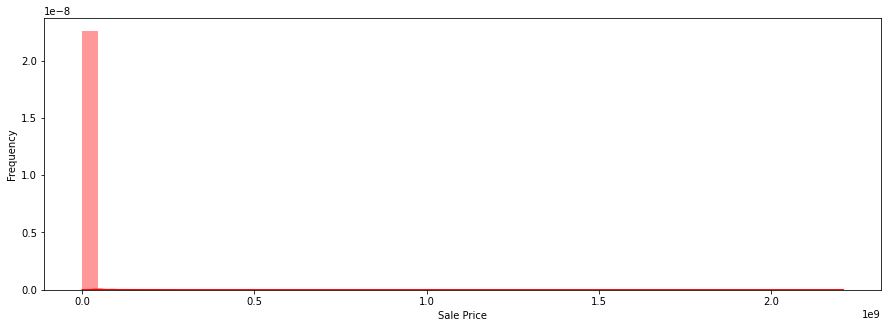

In [26]:
plt.figure(figsize=(15,5))

sns.distplot(df['SALE PRICE'], kde=True, color='r')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

data too many outliers and $0 price, need to remove outliers

In [27]:
#remove obsevariton only for SALE PRICE>10,000 USD to SALE Price <2,000,000 USD
dataSP = SP[(10000<SP) & (SP<2000000)]
len(dataSP)

51442

After considering obsevariton only for SALE PRICE>10,000 USD to SALE Price <2,000,000 USD, we are left with 51k observations, down from 70k at the very start, around 73% data to evaluated

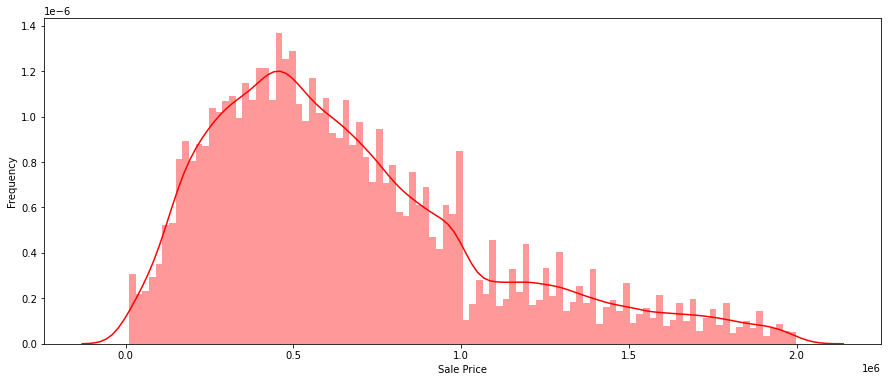

In [28]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(dataSP, kde=True, color='r',bins=100)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [29]:
dataSP.skew()

0.9800003123203985

# Confidence Intervals

In [30]:
#Data Brooklyn BOROUGH==3
df.groupby("BOROUGH").agg({'SALE PRICE': [np.size, np.mean, np.std]})

SALE PRICE                            
              size          mean           std
BOROUGH                                       
1          14374.0  3.344642e+06  2.414048e+07
2           6994.0  5.946771e+05  2.793509e+06
3          23843.0  8.410834e+05  3.951912e+06
4          18410.0  7.388827e+05  3.227420e+06
5           5986.0  5.436113e+05  1.905544e+06

In [31]:
mean_brk = 8.410834e+05
std_brk = 3.951912e+06
n_brk = 23843
z_brk = 1.95

stderr = std_brk / np.sqrt(n_brk)
print('standard error of mean:', stderr)

#CI
lcb = mean_brk - z_brk* stderr
ucb = mean_brk + z_brk* stderr
print('CI:', lcb,ucb)

standard error of mean: 25593.3311429182
CI: 791176.4042713095 890990.3957286905


#  Hypothesis Testing


## Difference in Population Means

Is BROOKLYN Mean SALE PRICE is significantly higher than QUEENS Mean Sale Price? (Considering SALE Price 10,000-2,000,000 USD to remove outlier)

H1 = Brooklyn Mean SALE != Queen Mean SALE (Higher)
HO = Brooklyn Mean SALE = Queen Mean SALE

In [32]:
#Brooklyn SALE PRICE only consdering SALE PRICE>10,000 USD to SALE Price <2,000,000 USD
bro_SP = df[(df['BOROUGH']==3)]['SALE PRICE']
bro_SP = bro_SP[(bro_SP>10000) & (bro_SP<2000000)]
print('Brooklyn Mean Sale Price:', bro_SP.mean())

#Queens SALE PRICE only consdering SALE PRICE>10,000 USD to SALE Price <2,000,000 USD
que_SP = df[(df['BOROUGH']==4)]['SALE PRICE']
que_SP = que_SP[(que_SP>10000) & (que_SP<2000000)]
print('Queens Mean Sale Price:', que_SP.mean() )

sm.stats.ztest(bro_SP,que_SP,alternative='two-sided')

Brooklyn Mean Sale Price: 772072.2818975726
Queens Mean Sale Price: 564509.7064803771


(46.52646758093837, 0.0)

## Conclusion of Hypothesis Test
p-value (0.0) < alpha, REJECT THE NULL HYPOTHESIS 

Brooklyn PRICE is higher than QUEENS mean SALE PRICE  

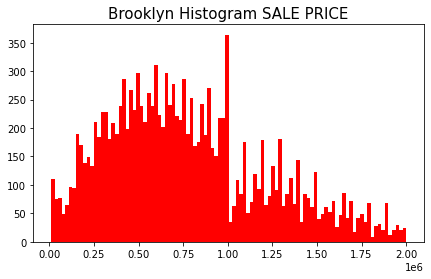

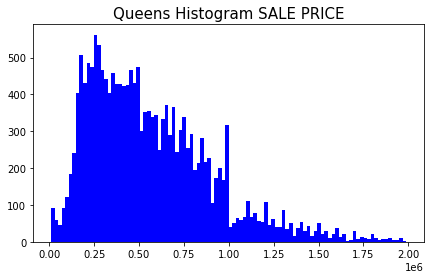

In [33]:
plt.figure(figsize=(7,4))
plt.title('Brooklyn Histogram SALE PRICE', fontsize= 15)
plt.hist(bro_SP,color='r', bins = 100)
plt.show()

plt.figure(figsize=(7,4))
plt.title('Queens Histogram SALE PRICE', fontsize= 15)
plt.hist(que_SP,color='b', bins = 100)
plt.show()